## <center> Аттестация. Практическое задание в Jupyter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Для нормального отображения в черной теме
plt.style.use('default')

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} + x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [5]:
solarpower = pd.read_csv('data\solarpower.csv')

In [6]:
solarpower_df = solarpower.copy()
solarpower_df['date'] = pd.to_datetime(solarpower_df['date'])

In [7]:
# Заменяю -1 на NaN
solarpower_df['cum_power'] = solarpower_df['cum_power'].apply(lambda x: x if x != -1 else np.nan)

In [8]:
# Вижу пропуски
solarpower_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       664 non-null    datetime64[ns]
 1   cum_power  662 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.5 KB


In [9]:
# Нахожу места пропусков
solarpower_df[solarpower_df['cum_power'].isnull()]

,date,cum_power
45,2017-02-15,NaN
647,2018-10-10,NaN


In [10]:
# Смотрю на пропуски через срезы датафрейма
solarpower_df.loc[44:46]

,date,cum_power
44,2017-02-14,20248.0
45,2017-02-15,NaN
46,2017-02-16,20262.0


In [11]:
solarpower_df.loc[646:648]

,date,cum_power
646,2018-10-09,27986.0
647,2018-10-10,NaN
648,2018-10-11,28010.0


In [12]:
# Заполняю пропуски импользуя функционал pandas
solarpower_df['cum_power'] = (solarpower_df['cum_power'].ffill() + solarpower_df['cum_power'].bfill()) / 2

In [13]:
# Еще раз смотрю на уже заполненные срезы
solarpower_df.loc[44:46]

,date,cum_power
44,2017-02-14,20248.0
45,2017-02-15,20255.0
46,2017-02-16,20262.0


In [14]:
solarpower_df.loc[646:648]

,date,cum_power
646,2018-10-09,27986.0
647,2018-10-10,27998.0
648,2018-10-11,28010.0


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [15]:
solarpower_df['day_power'] = solarpower_df['cum_power'].diff()
solarpower_df['day_power'].fillna(value=0, inplace=True)

In [17]:
solarpower_df['month'] = solarpower_df['date'].dt.to_period('M')
monthly_power = solarpower_df.groupby(by='month', as_index=False)['day_power'].sum()

In [20]:
solarpower_df

,date,cum_power,day_power,month
0,2017-01-01,20111.0,0.0,2017-01
1,2017-01-02,20112.0,1.0,2017-01
2,2017-01-03,20115.0,3.0,2017-01
3,2017-01-04,20117.0,2.0,2017-01
4,2017-01-05,20119.0,2.0,2017-01
...,...,...,...,...
659,2018-10-22,28101.0,6.0,2018-10
660,2018-10-23,28109.0,8.0,2018-10
661,2018-10-24,28115.0,6.0,2018-10
662,2018-10-25,28117.0,2.0,2018-10


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

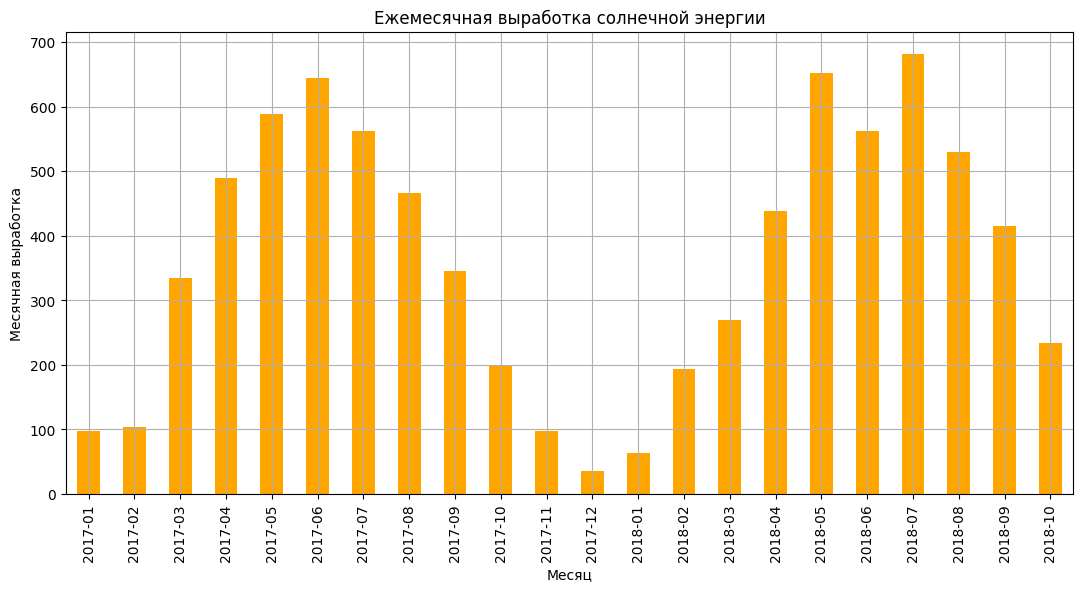

In [18]:
monthly_power.plot(
    x='month',
    kind='bar',
    figsize=(13, 6),
    title='Ежемесячная выработка солнечной энергии',
    grid = True,
    color = 'Orange',
    legend= False,
    xlabel='Месяц',
    ylabel='Месячная выработка'
);

Выработка солнечной энергии зависит от времени года:
- Весной начинается рост выработки
- Летом выработка на максимальных значениях
- Осенью снижение производства
- Зимой произзводится меньше всего энергии